# Notebook on data preprocessing

In [1]:
# import the library "pandas"; it is the most popular library for 
# working with data organized in tables (or data frames).
# import it with the name "pd" (this way we will need to type less :))

import pandas as pd

In [2]:
# load raw data. Unix synthax "../" means "go up one directory from the current one"
f0              = '../data/Objects_Population - Tracked Nuclei.csv'

# we can chain several commands: dataFrame.method1().method2().method3() etc.
# each subsequent command works on the output of the previous command.
# it is convenient to put these commands on different lines (better readability)
# Just dont forget to group those several lines with parentheses ():
df0             = ( pd
                   .read_csv( f0, sep='\t')  # separator sometimes differ from tab '\t'. It can be ',' or ';'
                   .dropna( axis = 0 )       # drop NaN (not a number) data. Axis = 0 tells to drop a Row if there is any NaN.
                   .reset_index( drop=True)  # after dropping a few rows , indexing changes. We can reset it right away.
                  )

df              = df0.copy()                 # Copy the original data (not necessary, I do it just to keep original data intact)

df.head(10)  # show first 10 lines.

,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X [µm],...,Bacteria,Tracked Nuclei - Track Point X,Tracked Nuclei - Track Point Y,Tracked Nuclei - SER TMRM SER Edge 0.535331905782 µm,Tracked Nuclei - SD/Mean TMRM,Tracked Nuclei - Intensity AnnexinV-647 Mean,Tracked Nuclei - Intensity Nucleus HOECHST 33342 Mean,Tracked Nuclei - Number of Legio- per Cell,Tracked Nuclei - Legio Area [µm²]- Sum per Cell,Tracked Nuclei - Infected
0,3.0,3.0,1.0,2.0,1.0,1.0,897.0,1581.0,"[696,1377,1134,1806]",-15.14,...,NI,918.0,1589.0,0.294030,0.562842,124.525,338.485,0.0,0.0,0.0
1,3.0,3.0,1.0,2.0,1.0,3.0,1001.0,137.0,"[885,33,1157,210]",-5.01,...,NI,1026.0,136.0,0.454834,0.195039,123.152,906.987,0.0,0.0,0.0
2,3.0,3.0,1.0,2.0,1.0,4.0,954.0,458.0,"[749,263,1206,608]",-10.48,...,NI,967.0,431.0,0.374378,0.327715,124.322,425.334,0.0,0.0,0.0
3,3.0,3.0,1.0,2.0,1.0,5.0,441.0,821.0,"[186,599,613,1032]",-59.97,...,NI,438.0,819.0,0.411751,0.254109,117.910,613.357,0.0,0.0,0.0
4,3.0,3.0,1.0,2.0,1.0,7.0,1712.0,549.0,"[1474,411,1894,682]",56.25,...,NI,1681.0,549.0,0.385718,0.461336,120.887,423.270,0.0,0.0,0.0
5,3.0,3.0,1.0,2.0,1.0,8.0,1575.0,1625.0,"[1499,1457,1680,1797]",46.87,...,NI,1581.0,1625.0,0.364799,0.513895,125.783,471.484,0.0,0.0,0.0
6,3.0,3.0,1.0,2.0,2.0,2.0,1658.0,149.0,"[1445,1,1842,342]",-543.56,...,NI,1647.0,156.0,0.345653,0.540175,119.748,298.231,0.0,0.0,0.0
7,3.0,3.0,1.0,2.0,2.0,3.0,1688.0,444.0,"[1489,336,1861,572]",-541.25,...,NI,1672.0,431.0,0.325738,0.577869,124.943,681.432,0.0,0.0,0.0
8,3.0,3.0,1.0,2.0,2.0,4.0,662.0,654.0,"[592,562,796,769]",-633.18,...,NI,688.0,665.0,0.390482,0.380477,121.398,657.923,0.0,0.0,0.0
9,3.0,3.0,1.0,2.0,2.0,5.0,927.0,701.0,"[724,534,1095,881]",-611.83,...,NI,917.0,706.0,0.343878,0.535484,125.664,276.845,0.0,0.0,0.0


# Clean the raw data
- We can optimize the column names
    - This may be needed if the raw data needs to be brought up to a specific format (fixed cokumn names)
    - Or if the column names are wrong or inconvenient
- We can remove NaN (not a number) data
- Remove unwanted columns


In [3]:
# Lets rename some columns, because the names are too long; 
# there are also greek characters that might cause some issues; let's change them into latin

# 1. Remove the too long prefix 'Tracked Nuclei - ' from the colum names

# first, let's iterate over all column names and check them for some patterns
prefix = 'Tracked Nuclei - ' # one pattern that we search for
columns2 = [] # empty list; here we will accumulate modified column names.

# dataframe.columns returns all column names; we loop over them:
for c in df.columns: # loop over each column name. The order is the same as in the dataframe.
    if c.startswith( prefix ): # if the column name starts with the specified pattern 'Tracked Nuclei -'
        c = c.replace( prefix,'') # replace this pattern with empty string (= remove this pattern)
    if c.endswith(' [µm]'):   # if the column name ens with the specified pattern
        c = c.replace(' [µm]','_um') # replace it with latin characters
    if c.endswith('µm'):
        c = c.replace('µm','um') # replace it with latin characters

    
    # accumulate the modified column name
    columns2.append( c )
    
# simply change the column names to the new ones.
df.columns = columns2

df.head() # note the new names of the columns


,Row,Column,Plane,Timepoint,Field,Object No,X,Y,Bounding Box,Position X_um,...,Bacteria,Track Point X,Track Point Y,SER TMRM SER Edge 0.535331905782 um,SD/Mean TMRM,Intensity AnnexinV-647 Mean,Intensity Nucleus HOECHST 33342 Mean,Number of Legio- per Cell,Legio Area [µm²]- Sum per Cell,Infected
0,3.0,3.0,1.0,2.0,1.0,1.0,897.0,1581.0,"[696,1377,1134,1806]",-15.14,...,NI,918.0,1589.0,0.294030,0.562842,124.525,338.485,0.0,0.0,0.0
1,3.0,3.0,1.0,2.0,1.0,3.0,1001.0,137.0,"[885,33,1157,210]",-5.01,...,NI,1026.0,136.0,0.454834,0.195039,123.152,906.987,0.0,0.0,0.0
2,3.0,3.0,1.0,2.0,1.0,4.0,954.0,458.0,"[749,263,1206,608]",-10.48,...,NI,967.0,431.0,0.374378,0.327715,124.322,425.334,0.0,0.0,0.0
3,3.0,3.0,1.0,2.0,1.0,5.0,441.0,821.0,"[186,599,613,1032]",-59.97,...,NI,438.0,819.0,0.411751,0.254109,117.910,613.357,0.0,0.0,0.0
4,3.0,3.0,1.0,2.0,1.0,7.0,1712.0,549.0,"[1474,411,1894,682]",56.25,...,NI,1681.0,549.0,0.385718,0.461336,120.887,423.270,0.0,0.0,0.0


### Give the columns simpler names


In [4]:
# create a dictionary with old/new names: {'oldname1':'newname1', 'oldname2':'newname2', ...}
col_names = {'Row'          : 'row',
             'Column'       : 'col',
             'Plane'        : 'plane',
             'Timepoint'    : 't',
             'Field'        : 'field',
             'Object No'    : 'N',
              'X'           : 'x',
              'Y'           : 'y', 
              'Bounding Box'    : 'bbox',
              'Position X_um'   : 'pos_x_um',
              'Position Y_um'   : 'pos_y_um',
              'Bacteria' : 'bact',
              'Track Point X'   : 'track_point_x',
              'Track Point Y'   : 'track_point_y',
              'SER TMRM SER Edge 0.535331905782 um' : 'mito_frag',
              'SD/Mean TMRM'    : 'mito_pot',
              'Intensity AnnexinV-647 Mean' :'annexin', 
              'Intensity Nucleus HOECHST 33342 Mean' : 'hoechst',
              'Number of Legio- per Cell '      : 'leg_n',
              'Legio Area [µm²]- Sum per Cell ' : 'leg_area',
              'Infected'        : 'infected'
              }

# use this dictionary as the argument to the method "rename"
df      = df.rename( columns = col_names )
df.head()

,row,col,plane,t,field,N,x,y,bbox,pos_x_um,...,bact,track_point_x,track_point_y,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected
0,3.0,3.0,1.0,2.0,1.0,1.0,897.0,1581.0,"[696,1377,1134,1806]",-15.14,...,NI,918.0,1589.0,0.294030,0.562842,124.525,338.485,0.0,0.0,0.0
1,3.0,3.0,1.0,2.0,1.0,3.0,1001.0,137.0,"[885,33,1157,210]",-5.01,...,NI,1026.0,136.0,0.454834,0.195039,123.152,906.987,0.0,0.0,0.0
2,3.0,3.0,1.0,2.0,1.0,4.0,954.0,458.0,"[749,263,1206,608]",-10.48,...,NI,967.0,431.0,0.374378,0.327715,124.322,425.334,0.0,0.0,0.0
3,3.0,3.0,1.0,2.0,1.0,5.0,441.0,821.0,"[186,599,613,1032]",-59.97,...,NI,438.0,819.0,0.411751,0.254109,117.910,613.357,0.0,0.0,0.0
4,3.0,3.0,1.0,2.0,1.0,7.0,1712.0,549.0,"[1474,411,1894,682]",56.25,...,NI,1681.0,549.0,0.385718,0.461336,120.887,423.270,0.0,0.0,0.0


### Remove the columns that are not needed 

In [5]:
# If the columns are not needed for our study (i.e. 'pos_x_um' or 'x' or 'plane' -
# these columns contain information that should not affect the infection rate, and thus
# we will not use them for studying correlations between the signals.
to_drop = ['plane', 'bbox', 'pos_x_um', 'pos_y_um', 'track_point_x', 'track_point_y']
df = df.drop(columns=to_drop)
df.head()


,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected
0,3.0,3.0,2.0,1.0,1.0,897.0,1581.0,NI,0.294030,0.562842,124.525,338.485,0.0,0.0,0.0
1,3.0,3.0,2.0,1.0,3.0,1001.0,137.0,NI,0.454834,0.195039,123.152,906.987,0.0,0.0,0.0
2,3.0,3.0,2.0,1.0,4.0,954.0,458.0,NI,0.374378,0.327715,124.322,425.334,0.0,0.0,0.0
3,3.0,3.0,2.0,1.0,5.0,441.0,821.0,NI,0.411751,0.254109,117.910,613.357,0.0,0.0,0.0
4,3.0,3.0,2.0,1.0,7.0,1712.0,549.0,NI,0.385718,0.461336,120.887,423.270,0.0,0.0,0.0


# The dataframe is now neater and easy to read.
### Let's study how to select a dataframe subset

In [6]:
# Goal: Remove non-infected cells from the dataframe
# We can select subsets of the data based on some conditions. For instance, we want to select only non-infected cells.
# Condition returns Series of booleans, with True where the condition is correct:
df['bact'] == 'NI'

0         True
1         True
2         True
3         True
4         True
         ...  
68664    False
68665    False
68666    False
68667    False
68668    False
Name: bact, Length: 68669, dtype: bool

In [7]:
# we can use this boolean Series to select a subset of data; use the boolean Series as indexing mask:
# dataframe[ boolean_series ]
# Lets select a subset where the cells are Not Infected
df[ df['bact'] != 'NI' ]

,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected
25372,4.0,3.0,3.0,1.0,1.0,1304.0,1617.0,Lpp WT,0.478215,0.140332,125.717,346.814,0.0,0.00000,0.0
25373,4.0,3.0,3.0,1.0,2.0,1687.0,247.0,Lpp WT,0.332835,0.460420,137.424,488.559,3.0,15.57900,1.0
25374,4.0,3.0,3.0,1.0,3.0,1129.0,777.0,Lpp WT,0.463625,0.169537,125.130,505.305,6.0,13.49190,1.0
25375,4.0,3.0,3.0,1.0,4.0,1640.0,977.0,Lpp WT,0.424818,0.376507,127.588,654.482,2.0,2.87303,1.0
25376,4.0,3.0,3.0,1.0,5.0,599.0,1135.0,Lpp WT,0.435619,0.234078,124.111,499.972,6.0,32.32810,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68664,5.0,7.0,16.0,23.0,7.0,2093.0,223.0,Lpp dotA,0.405430,0.264235,137.000,285.601,10.0,27.62990,1.0
68665,5.0,7.0,16.0,23.0,8.0,286.0,997.0,Lpp dotA,0.443864,0.233500,144.499,291.274,2.0,2.90796,1.0
68666,5.0,7.0,16.0,23.0,9.0,389.0,1535.0,Lpp dotA,0.491319,0.159080,696.717,4466.440,9.0,25.01020,1.0
68667,5.0,7.0,16.0,23.0,10.0,2080.0,1551.0,Lpp dotA,0.441638,0.180062,125.842,301.806,5.0,6.25254,1.0


In [8]:
# We can select this subset and reuse the old variable name
df = df[ df['bact'] != 'NI' ].reset_index( drop=True) # I also reset the index here.
df.head(10)

# note that now the variable "df" is modified: it lacks the rows where Bacteria=='NI'.

,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected
0,4.0,3.0,3.0,1.0,1.0,1304.0,1617.0,Lpp WT,0.478215,0.140332,125.717,346.814,0.0,0.00000,0.0
1,4.0,3.0,3.0,1.0,2.0,1687.0,247.0,Lpp WT,0.332835,0.460420,137.424,488.559,3.0,15.57900,1.0
2,4.0,3.0,3.0,1.0,3.0,1129.0,777.0,Lpp WT,0.463625,0.169537,125.130,505.305,6.0,13.49190,1.0
3,4.0,3.0,3.0,1.0,4.0,1640.0,977.0,Lpp WT,0.424818,0.376507,127.588,654.482,2.0,2.87303,1.0
4,4.0,3.0,3.0,1.0,5.0,599.0,1135.0,Lpp WT,0.435619,0.234078,124.111,499.972,6.0,32.32810,1.0
5,4.0,3.0,3.0,1.0,6.0,1812.0,1262.0,Lpp WT,0.451510,0.184996,123.065,491.919,3.0,4.46236,1.0
6,4.0,3.0,3.0,1.0,8.0,2029.0,228.0,Lpp WT,0.440855,0.239893,116.559,468.809,4.0,8.76753,1.0
7,4.0,3.0,3.0,1.0,9.0,842.0,633.0,Lpp WT,0.407265,0.266056,123.159,354.406,1.0,1.25749,1.0
8,4.0,3.0,3.0,1.0,11.0,2099.0,1106.0,Lpp WT,0.428346,0.251716,118.160,423.331,3.0,5.72859,1.0
9,4.0,3.0,3.0,1.0,12.0,2124.0,829.0,Lpp WT,0.404483,0.270734,115.097,233.348,3.0,7.13453,1.0


### Combining several selection conditions

In [9]:
# We can also combine several conditions using operator "&"
# use parentheses for combining boolean Series: (bool_series_1) & (bool_series_2)

# lets select a subset from the well at Row 4 and Column 5 (a well from the plate), field of view = 15
_r = 4
_c = 5
_f = 15
# I use the underscore prefix "_name" to remind myself that the variable is not important (and may require deletion to clean memory) 
# You can name them anything you like.

inds = ( df['row'] == _r ) & (df['col'] == _c) & (df['field']==_f)
df[inds]
    
# look at the output and check that the Row and Column of the data is only 4 and 5.

,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected
10963,4.0,5.0,1.0,15.0,1.0,1639.0,182.0,Lpp WT,0.385354,0.322148,120.129,327.247,2.0,1.83385,1.0
10964,4.0,5.0,1.0,15.0,2.0,1954.0,209.0,Lpp WT,0.400220,0.418381,317.435,422.165,4.0,8.47062,1.0
10965,4.0,5.0,1.0,15.0,3.0,165.0,298.0,Lpp WT,0.491467,0.080557,136.722,485.614,0.0,0.00000,0.0
10966,4.0,5.0,1.0,15.0,4.0,1262.0,656.0,Lpp WT,0.397903,0.281372,124.741,382.099,4.0,6.94242,1.0
10967,4.0,5.0,1.0,15.0,5.0,1423.0,1259.0,Lpp WT,0.419272,0.315065,128.323,464.074,8.0,12.03350,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,4.0,5.0,15.0,15.0,9.0,762.0,1416.0,Lpp WT,0.513822,0.082038,1221.830,5158.680,1.0,1.87751,1.0
18043,4.0,5.0,15.0,15.0,10.0,1473.0,1703.0,Lpp WT,0.502660,0.147879,1081.880,4319.990,6.0,11.25630,1.0
18044,4.0,5.0,15.0,15.0,11.0,634.0,2012.0,Lpp WT,0.508049,0.092648,1381.320,1441.580,1.0,5.66746,1.0
18045,4.0,5.0,15.0,15.0,12.0,1159.0,447.0,Lpp WT,0.519038,0.048108,611.272,207.507,0.0,0.00000,0.0


# Give each well a unique ID

In [10]:
# the data comes from wells (plates), it is convenient to give each well unique ID.
# lets simply number the wells from left to right, row by row and use this number as ID

df['well_id']       = -1  # create a new column with default value of -1.
rows                = df['row'].unique()   # get the list of unique rows present in the dataframe
cols                = df['col'].unique() # get the list of unique columns present in the dataframe

# loop over rows and columns, calculate the well ID.
_well_id             = 0
for ri, _r in enumerate(rows):
    for ci, _c in enumerate(cols):
        inds = ( df['row'] == _r ) & (df['col'] == _c) # select subset with the current row and column
        # we have to select indices using this synthaxis: dataframe.loc[bool_series, column_name] = value
        # we cannot use "dataframe[bool_series, column_name] = value", because pandas actually returns
        # a COPY of the dataframe, and the value will be set in the copy, not in the original data.
        # to access the actual data, use the method .loc()
        _well_id += 1 # add 1 to the well counter
        df.loc[inds, 'well_id']  = _well_id

df.tail(10) # show last 10 lines of the dataframe
# the column 'well_id' is the last column

,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,well_id
42588,5.0,7.0,16.0,23.0,1.0,1857.0,109.0,Lpp dotA,0.397002,0.300838,117.217,243.340,0.0,0.00000,0.0,10
42589,5.0,7.0,16.0,23.0,3.0,1481.0,320.0,Lpp dotA,0.397231,0.309315,131.779,665.237,6.0,13.74510,1.0,10
42590,5.0,7.0,16.0,23.0,4.0,1952.0,657.0,Lpp dotA,0.299312,0.821703,124.001,469.417,8.0,7.08214,1.0,10
42591,5.0,7.0,16.0,23.0,5.0,1534.0,1145.0,Lpp dotA,0.436326,0.225074,160.390,733.445,10.0,23.96230,1.0,10
42592,5.0,7.0,16.0,23.0,6.0,231.0,101.0,Lpp dotA,0.352182,0.406991,110.768,333.227,5.0,1.86878,1.0,10
42593,5.0,7.0,16.0,23.0,7.0,2093.0,223.0,Lpp dotA,0.405430,0.264235,137.000,285.601,10.0,27.62990,1.0,10
42594,5.0,7.0,16.0,23.0,8.0,286.0,997.0,Lpp dotA,0.443864,0.233500,144.499,291.274,2.0,2.90796,1.0,10
42595,5.0,7.0,16.0,23.0,9.0,389.0,1535.0,Lpp dotA,0.491319,0.159080,696.717,4466.440,9.0,25.01020,1.0,10
42596,5.0,7.0,16.0,23.0,10.0,2080.0,1551.0,Lpp dotA,0.441638,0.180062,125.842,301.806,5.0,6.25254,1.0,10
42597,5.0,7.0,16.0,23.0,11.0,1837.0,1910.0,Lpp dotA,0.377950,0.338777,120.823,255.089,6.0,24.80930,1.0,10


# Give each tracked cell a unique ID

### Lets study pandas grouping first.

In [11]:
# grouping is an important mechanism in Pandas. We can split the data into subgroups based on a specific feature.
# E.g in our case we can split by the Well ID.

# when the method "group" is called, it retruns a Generator (the grouped dataframe does not exist yet; it is generated on the fly)
# to make it existent, one could convert it into a list.

# lets group the data by well_id, field and N (N is the number of a cell in the current field of view)
gr = df.groupby(['well_id', 'field', 'N'])
gr # it is a generator

In [12]:
# we can check any group right away; say we want a group with these parameters:
_wid = 10
_f = 20
_n = 1

# the generator has a field "groups", which is a dictionary that has the Indices of the requested group
gr.groups[_wid, _f, _n] # returns index Series


Int64Index([40049, 40535, 40587, 40664, 40760, 40874, 40914, 41036, 41120,
            41429, 41513, 41631, 41844, 41956, 42141, 42219, 42452, 42567],
           dtype='int64')

In [13]:
# we can use these indices with the method .loc to get a subset of the data.
df.loc[ gr.groups[_wid, _f, _n] ]
# note that the returned subset is 1 cell with exactly those parameters we wanted 
# (contains the requested well id, field of view and the cell number)

# !! Note that the time column "t" is not sorted.

,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,well_id
40049,5.0,7.0,0.0,20.0,1.0,1797.0,239.0,Lpp dotA,0.481184,0.250589,991.752,2916.22,4.0,4.89899,1.0,10
40535,5.0,7.0,1.0,20.0,1.0,1773.0,210.0,Lpp dotA,0.479763,0.311194,1132.110,4713.80,5.0,6.19141,1.0,10
40587,5.0,7.0,4.0,20.0,1.0,1770.0,200.0,Lpp dotA,0.475844,0.233385,1129.900,4825.36,5.0,7.08214,1.0,10
40664,5.0,7.0,9.0,20.0,1.0,1782.0,220.0,Lpp dotA,0.474500,0.258005,1062.940,4257.14,4.0,4.81166,1.0,10
40760,5.0,7.0,10.0,20.0,1.0,1805.0,137.0,Lpp dotA,0.486473,0.195419,1023.090,3268.37,3.0,3.36205,1.0,10
40874,5.0,7.0,11.0,20.0,1.0,1805.0,126.0,Lpp dotA,0.484221,0.204491,961.093,2613.45,3.0,3.09134,1.0,10
40914,5.0,7.0,14.0,20.0,1.0,1802.0,132.0,Lpp dotA,0.470939,0.222173,980.427,3038.81,3.0,5.30069,1.0,10
41036,5.0,7.0,8.0,20.0,1.0,1783.0,225.0,Lpp dotA,0.483450,0.255999,1072.780,4137.33,4.0,4.99505,1.0,10
41120,5.0,7.0,7.0,20.0,1.0,1785.0,225.0,Lpp dotA,0.488264,0.219732,1093.710,4291.35,4.0,4.95138,1.0,10
41429,5.0,7.0,2.0,20.0,1.0,1778.0,212.0,Lpp dotA,0.484334,0.266515,1263.310,3738.55,4.0,5.94690,1.0,10


### Lets now iterate over each group (=each cell), sort the time column and accumulate all cell dataframes in a new dataframe

In [14]:
cells_df = pd.DataFrame() # empty dataframe; it will accumulate all subsets.


# the method "items" is a dictionary method; it returns all dictionary entries as pairs:
# dict.items() returns pairs of [(key1, value1),(key2, value2), ...]. We can iterate over those using simple loop:

for k,v in gr.groups.items(): 
    # k = key ([w,f,n] in our case)
    # v = value (index Series in our case)
    w,f,c = k # we can unpack the tuple k right away. We know it has 3 items: well id, field of view, and cell N

    _df = (df
           .loc[v]  # v = index Series; lets use .loc to get a df subset
           .sort_values('t') # sort the obtained subset by the time column
          )
    # as a result, _df is a subset that holds data for 1 cell only. The data is also sorted by Time.
    
    _cell_id    = 'w%d_f%d_c%d'%(w,f,c) # this creates a unique cell id; e.g. w10_f20_c1 = well 10, fov 20, cellN 1
    # the synthax 'pattern_%d'%N produces a string 'pattern_valueN'; for example:
    # n = 1
    # 'cell_%d'%n
    # result is 'cell_1'
    # read more about the string formatting in python; it is important:
    # https://realpython.com/python-string-formatting/
    
    _df['cell_lbl'] = _cell_id # create a new column with this unique cell ID
    cells_df      = cells_df.append( _df ) # append this subset to the "accumulator"

In [15]:
cells_df.tail(15) # see the last 15 lines; note there is a new column "cell_lbl".

,row,col,t,field,N,x,y,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,well_id,cell_lbl
40780,5.0,7.0,10.0,25.0,6.0,2035.0,775.0,Lpp dotA,0.415859,0.284194,134.266,383.059,4.0,6.15648,1.0,10,w10_f25_c6
41260,5.0,7.0,11.0,25.0,6.0,2047.0,804.0,Lpp dotA,0.422633,0.274501,124.780,387.084,5.0,8.12132,1.0,10,w10_f25_c6
41995,5.0,7.0,12.0,25.0,6.0,2041.0,788.0,Lpp dotA,0.413072,0.278085,133.718,362.163,4.0,6.13028,1.0,10,w10_f25_c6
42152,5.0,7.0,13.0,25.0,6.0,2034.0,799.0,Lpp dotA,0.440898,0.227144,133.875,440.976,3.0,5.58013,1.0,10,w10_f25_c6
40951,5.0,7.0,14.0,25.0,6.0,2023.0,780.0,Lpp dotA,0.435091,0.231253,139.243,450.542,4.0,6.33987,1.0,10,w10_f25_c6
42257,5.0,7.0,15.0,25.0,6.0,2006.0,766.0,Lpp dotA,0.394414,0.329596,139.649,414.522,8.0,6.10409,1.0,10,w10_f25_c6
42274,5.0,7.0,16.0,25.0,6.0,2020.0,751.0,Lpp dotA,0.428944,0.220211,144.880,427.168,4.0,9.02951,1.0,10,w10_f25_c6
42476,5.0,7.0,17.0,25.0,6.0,2005.0,719.0,Lpp dotA,0.436208,0.215616,138.877,482.554,4.0,7.48384,1.0,10,w10_f25_c6
41880,5.0,7.0,6.0,25.0,7.0,33.0,1043.0,Lpp dotA,0.498145,0.043844,116.568,306.264,0.0,0.00000,0.0,10,w10_f25_c7
41159,5.0,7.0,7.0,25.0,7.0,79.0,1061.0,Lpp dotA,0.524200,0.057012,114.475,298.380,0.0,0.00000,0.0,10,w10_f25_c7


# We can visualize some data

(613.2499999999999, 1861.7499999999998, 27.150000000000006, 2201.8499999999995)

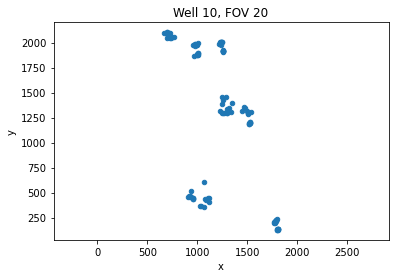

In [16]:
# group by  thw well id and the field of view
gr = df.groupby(['well_id','field'])
# select one FOV
_wid, _f = 10, 20
_df = df.loc[ gr.groups[_wid, _f] ]

# plot
ax = _df.plot.scatter('x','y')
ax.set_title('Well %d, FOV %d'%(_wid, _f))
ax.axis('equal')

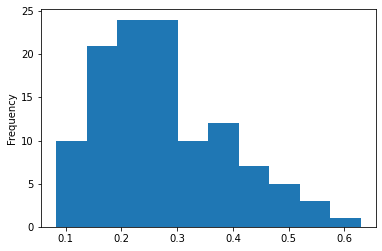

In [17]:
# or a histogram
_df['mito_pot'].plot.hist()

### For more flexibility we could use plotting libraries
- matplotlib
- seaborn
- others...

Text(0.5, 1.0, 'Mitochondria Potential')

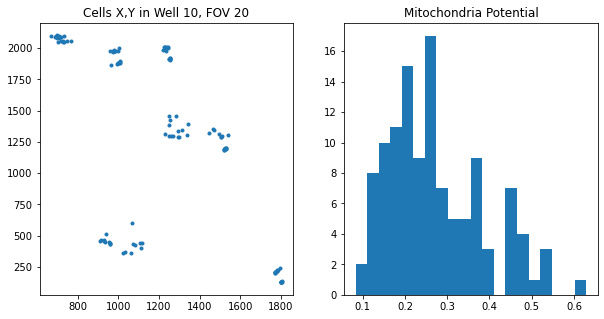

In [18]:
# we can visualize the tracks (just out of interest)
# the most popular library for plotting is matplotlib
import matplotlib.pyplot as plt

# pick a Well and a Field of View
_wid, _f = 10, 20
gr = df.groupby(['well_id','field'])
_df = df.loc[ gr.groups[_wid, _f] ]

# create a figure; I like to use this synthax, because it gives me control over the figure and axes right away:
fig, axs = plt.subplots(1,2, figsize=(10,5)) # row=1, column=2
ax=axs[0] #first axis
ax.plot( _df['x'], _df['y'], '.'  ) # plot x and y coordinates
ax.set_title('Cells X,Y in Well %d, FOV %d'%(_wid, _f))

ax=axs[1] #second axis
ax.hist( _df['mito_pot'], bins=20) 
ax.set_title('Mitochondria Potential')


# Finally, we can drop the rest of unwanted data and save the dataframe

In [19]:
# we can also now remove the obsolete columns, as they are not needed anymore
to_drop = ['row','col','field', 'N', 'well_id', 'x', 'y' ]
cells_df = cells_df.drop(columns=to_drop)
cells_df.head()

,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
1314,0.0,Lpp WT,0.431446,0.256032,126.836,217.240,8.0,10.00760,1.0,w1_f1_c1
1077,1.0,Lpp WT,0.484533,0.121939,125.335,346.889,0.0,0.00000,0.0,w1_f1_c1
308,2.0,Lpp WT,0.488785,0.115264,125.288,432.361,0.0,0.00000,0.0,w1_f1_c1
0,3.0,Lpp WT,0.478215,0.140332,125.717,346.814,0.0,0.00000,0.0,w1_f1_c1
850,4.0,Lpp WT,0.474289,0.178344,125.518,426.399,1.0,2.29667,1.0,w1_f1_c1


In [20]:
file_path = '../data/dataset_clean_1.csv'

# savea s csv
cells_df.to_csv( file_path )

In [21]:
# try to load it
df        = pd.read_csv( file_path )
df.head(10)

# note that there is column 'Unnamed: 0'. In order not to have it, use this option when saving as csv:

,Unnamed: 0,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
0,1314,0.0,Lpp WT,0.431446,0.256032,126.836,217.240,8.0,10.007600,1.0,w1_f1_c1
1,1077,1.0,Lpp WT,0.484533,0.121939,125.335,346.889,0.0,0.000000,0.0,w1_f1_c1
2,308,2.0,Lpp WT,0.488785,0.115264,125.288,432.361,0.0,0.000000,0.0,w1_f1_c1
3,0,3.0,Lpp WT,0.478215,0.140332,125.717,346.814,0.0,0.000000,0.0,w1_f1_c1
4,850,4.0,Lpp WT,0.474289,0.178344,125.518,426.399,1.0,2.296670,1.0,w1_f1_c1
5,1940,5.0,Lpp WT,0.481473,0.135201,125.583,278.538,2.0,1.536940,1.0,w1_f1_c1
6,1492,6.0,Lpp WT,0.470587,0.174567,126.060,482.551,3.0,0.270711,1.0,w1_f1_c1
7,2190,7.0,Lpp WT,0.474153,0.159039,125.744,419.905,2.0,1.152700,1.0,w1_f1_c1
8,2397,8.0,Lpp WT,0.493505,0.106421,142.832,395.935,1.0,0.401700,1.0,w1_f1_c1
9,2867,9.0,Lpp WT,0.513772,0.078543,448.848,743.010,1.0,0.069861,1.0,w1_f1_c1


In [22]:
# note that there is column 'Unnamed: 0'. In order not to have it, use this option when saving as csv:
cells_df.to_csv( file_path, index=False )
df        = pd.read_csv( file_path )
df.head(10)

,t,bact,mito_frag,mito_pot,annexin,hoechst,leg_n,leg_area,infected,cell_lbl
0,0.0,Lpp WT,0.431446,0.256032,126.836,217.240,8.0,10.007600,1.0,w1_f1_c1
1,1.0,Lpp WT,0.484533,0.121939,125.335,346.889,0.0,0.000000,0.0,w1_f1_c1
2,2.0,Lpp WT,0.488785,0.115264,125.288,432.361,0.0,0.000000,0.0,w1_f1_c1
3,3.0,Lpp WT,0.478215,0.140332,125.717,346.814,0.0,0.000000,0.0,w1_f1_c1
4,4.0,Lpp WT,0.474289,0.178344,125.518,426.399,1.0,2.296670,1.0,w1_f1_c1
5,5.0,Lpp WT,0.481473,0.135201,125.583,278.538,2.0,1.536940,1.0,w1_f1_c1
6,6.0,Lpp WT,0.470587,0.174567,126.060,482.551,3.0,0.270711,1.0,w1_f1_c1
7,7.0,Lpp WT,0.474153,0.159039,125.744,419.905,2.0,1.152700,1.0,w1_f1_c1
8,8.0,Lpp WT,0.493505,0.106421,142.832,395.935,1.0,0.401700,1.0,w1_f1_c1
9,9.0,Lpp WT,0.513772,0.078543,448.848,743.010,1.0,0.069861,1.0,w1_f1_c1
